<a href="https://colab.research.google.com/github/matheus97eng/Bootcamp_Alura_2021/blob/main/modulo-2/aulas/notebooks/aula_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Lendo arquivos csv de repositórios do github

Os dados utilizados nesse github continuam [neste repositório da Alura](https://github.com/alura-cursos/agendamento-hospitalar/tree/main/dados). Mas também utilizaremos dados mais novos, baixados por mim no TABNET, no dia 26/05/2021 e colocados [neste repositório](https://github.com/matheus97eng/Bootcamp_Alura_2021/tree/main/modulo-1/projeto_final/dados)

In [ ]:
# importando pandas

import pandas as pd

In [ ]:
repositorio_alura = 'https://github.com/alura-cursos/agendamento-hospitalar/raw/main/dados/A160324189_28_143_208.csv'
meu_repositorio = 'https://github.com/matheus97eng/Bootcamp_Alura_2021/raw/main/modulo-1/projeto_final/dados/gastos_totais.csv'

dados = pd.read_csv(repositorio_alura,
                    encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=12,
                    thousands=".", decimal=",")
dados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  import sys


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,9.291297e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,4.206680e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1.771655e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,3.050109e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4.437116e+09


# O que foi feito no módulo 1

## O que foi feito na aula 2

### Eliminando colunas com dados nulos

Por diversas vezes precisamos eliminar ou mesmo preencher valores nulos no dataframe. No nosso caso, iremos eliminar, deixando nos nossos dados somente as colunas que possuem os valores gastos em todos os estados. Como estratégia usaremos a função mean, pois essa função faz a média somente das colunas onde todos os valores estão preenchidos. A função mean gera uma série onde os indexs são os anos/meses onde foram calculadas as médias. Esses são os valores que queremos para o slice. Mas essas não são as únicas colunas que queremos. Precisamos de uma coluna também que nos informe qual é a unidade da federação. Essa é a primeira coluna dos dados originais.

In [ ]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, 'Unidade da Federação')
# agora sim podemos fazer o slice
usaveis = dados[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,9.291297e+08
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,4.206680e+08
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1.771655e+09
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.

### Colocando os estados como índices

Vamos alterar os índices do dataframe para uma informação mais interessante: as unidades da federação

In [ ]:
usaveis = usaveis.set_index('Unidade da Federação')

In [ ]:
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,9.291297e+08
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,4.206680e+08
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1.771655e+09
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,268

### Gráfico feito na aula 2:

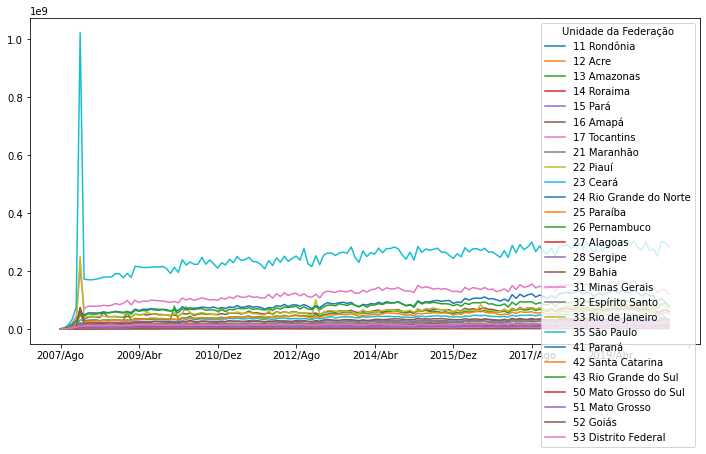

In [ ]:
# retirando a coluna 'Total' para visualizar melhor o gráfico:
usaveis = usaveis.drop('Total', axis=1)

usaveis.T.plot(figsize=(12,6))

## O que foi feito na aula 3:

### Adicionando novamente a coluna 'Total':

In [ ]:
usaveis["Total"] = usaveis.sum(axis=1)
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,9.255727e+08
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,4.206668e+08
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1.766926e+09
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,268

### Ordenar os estados pelos maiores gastos

Agora a coluna 'Total' será muito útil. Vamos ordenar o dataframe pelos maiores gastos entre os estados. Para isso podemos utilizar os dados da coluna 'Total', do maior valor para o menor.

In [ ]:
ordenado_por_total = usaveis.sort_values("Total", ascending=False) 
ordenado_por_total = ordenado_por_total.drop(["Total"], axis=1)
ordenado_por_total.head(2)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.023565e+09,1.728349e+08,1.704818e+08,1.702783e+08,1.724022e+08,1.754166e+08,1.795250e+08,1.798981e+08,1.800822e+08,1.916852e+08,1.905397e+08,1.770864e+08,1.923216e+08,1.785964e+08,2.169516e+08,2.150530e+08,2.128902e+08,2.126709e+08,2.140412e+08,2.152125e+08,2.141354e+08,2.160566e+08,2.089739e+08,1.921271e+08,2.134679e+08,1.957848e+08,2.393239e+08,2.211730e+08,2.317775e+08,2.239338e+08,2.240679e+08,2.480101e+08,2.240530e+08,2.389355e+08,2.254841e+08,...,2.634718e+08,2.921134e+08,2.743011e+08,2.835346e+08,3.005937e+08,2.672972e+08,2.871148e+08,2.671132e+08,2.594517e+08,2.794976e+08,2.540046e+08,2.852706e+08,2.861920e+08,2.914409e+08,2.789260e+08,2.858519e+08,2.954193e+08,2.775762e+08,3.014549e+08,2.781143e+08,2.662398e+08,2.910814e+08,2.676625e+08,2.855763e+08,2.925848e+08,3.089256e+08,2.814051e+08,3.066340e+08,3.023673e+08,2.936857e+08,3.033825e+08,2.823918e+08,2.726977e+08,3.019912e+08,2.713568e+08,2.766063e+08,2.516964e+08,3.028577e+08,2.990609e+08,2.827096e+08
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.059127e+08,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,7.960865e+07,8.220022e+07,8.037412e+07,8.240015e+07,8.861348e+07,8.448700e+07,8.892863e+07,9.901816e+07,8.367512e+07,1.002407e+08,9.183133e+07,9.728970e+07,9.572340e+07,1.000500e+08,9.896806e+07,9.820212e+07,9.696239e+07,9.476764e+07,9.241277e+07,9.580656e+07,9.076489e+07,1.073899e+08,1.008298e+08,1.054856e+08,9.966612e+07,1.033570e+08,1.078443e+08,1.043411e+08,1.005254e+08,1.019436e+08,...,1.367151e+08,1.534121e+08,1.442914e+08,1.475335e+08,1.560556e+08,1.422851e+08,1.483061e+08,1.423239e+08,1.383412e+08,1.465016e+08,1.307021e+08,1.514962e+08,1.506876e+08,1.535893e+08,1.502518e+08,1.566340e+08,1.604200e+08,1.459410e+08,1.572476e+08,1.481728e+08,1.453872e+08,1.531773e+08,1.426692e+08,1.519436e+08,1.579226e+08,1.635915e+08,1.541148e+08,1.667357e+08,1.617078e+08,1.574197e+08,1.661338e+08,1.521067e+08,1.523986e+08,1.580979e+08,1.413232e+08,1.470786e+08,1.263306e+08,1.368673e+08,1.359776e+08,1.204672e+08


### Tratando os picos muito grandes

No notebook da aula passada, verificamos os picos grandes, aonde eles se localizavam e como afetavam os gráficos. Na aula 3 foi discutido que esses picos podem estar relacionados com o começo do registro de gastos. Como o início dos registros se teve em Janeiro de 2008, várias datas de gastos do SUS podem ter sido perdidas. O que pode ter acontecido é o SUS ter optado por registrar esses gastos com a data em que começou o registro, ou seja, Janeiro de 2008.

Para evitar más interpretações, será retirado dos gráficos os dados dos meses até Janeiro de 2008. Assim, começaremos o plot com o mês de Fevereiro.

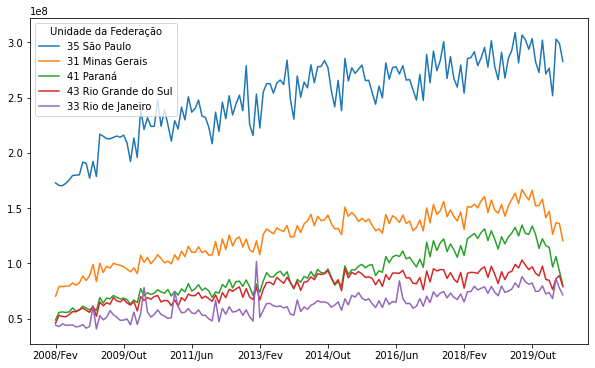

In [ ]:
ordenado_por_total = ordenado_por_total[ordenado_por_total.columns[6:]]
ordenado_por_total.head(5).T.plot(figsize=(10,6))

## O que foi feito na aula 5

In [ ]:
mes_mais_recente = ordenado_por_total.columns[-1]
gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]
gastos_do_mais_recente

Unidade da Federação
35 São Paulo              2.827096e+08
31 Minas Gerais           1.204672e+08
41 Paraná                 8.032085e+07
43 Rio Grande do Sul      7.892970e+07
33 Rio de Janeiro         7.154023e+07
29 Bahia                  5.889810e+07
26 Pernambuco             6.232544e+07
42 Santa Catarina         5.176453e+07
23 Ceará                  3.080922e+07
52 Goiás                  3.349928e+07
15 Pará                   2.761873e+07
21 Maranhão               2.437421e+07
32 Espírito Santo         2.746048e+07
24 Rio Grande do Norte    1.959306e+07
25 Paraíba                1.549147e+07
53 Distrito Federal       2.223354e+07
50 Mato Grosso do Sul     1.250872e+07
22 Piauí                  1.801921e+07
27 Alagoas                1.308785e+07
51 Mato Grosso            1.308315e+07
13 Amazonas               1.335851e+07
28 Sergipe                3.312766e+06
17 Tocantins              4.489666e+06
11 Rondônia               7.407388e+06
12 Acre                   1.163813e+06
14 R

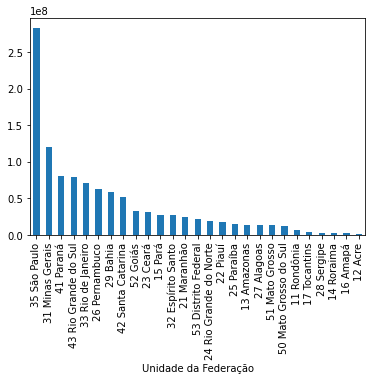

In [ ]:
gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending=False)
gastos_do_mais_recente.plot(kind='bar')

# Salvando dados em um arquivo csv para utilizarmos mais tarde

In [ ]:
gastos_do_mais_recente.to_csv('out_gastos_mais_recente.csv')

# Voltando ao módulo 2

Obtendo gastos proporciaonais dos estados com o gasto total do país.

In [ ]:
gastos_do_mais_recente / gastos_do_mais_recente.sum()

Unidade da Federação
35 São Paulo              0.257158
31 Minas Gerais           0.109579
41 Paraná                 0.073061
43 Rio Grande do Sul      0.071796
33 Rio de Janeiro         0.065074
26 Pernambuco             0.056692
29 Bahia                  0.053575
42 Santa Catarina         0.047086
52 Goiás                  0.030472
23 Ceará                  0.028025
15 Pará                   0.025123
32 Espírito Santo         0.024979
21 Maranhão               0.022171
53 Distrito Federal       0.020224
24 Rio Grande do Norte    0.017822
22 Piauí                  0.016391
25 Paraíba                0.014091
13 Amazonas               0.012151
27 Alagoas                0.011905
51 Mato Grosso            0.011901
50 Mato Grosso do Sul     0.011378
11 Rondônia               0.006738
17 Tocantins              0.004084
28 Sergipe                0.003013
14 Roraima                0.002492
16 Amapá                  0.001960
12 Acre                   0.001059
Name: 2020/Jul, dtype: float64

Agora sabemos como proporcionalmente foram os gastos de cada estado. Vamos plotar em um gráfico para ficar mais fácil da visualização. 

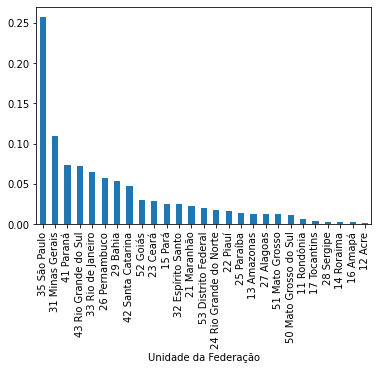

In [ ]:
gastos_proporcionais = gastos_do_mais_recente / gastos_do_mais_recente.sum()
gastos_proporcionais.plot(kind='bar')

Mas essas proporções estão de acordo com as proporções das populações? Para isso precisamos saber a estimativa populacional de cada UF. Podemos obter isso por exemplo do site do IBGE. Eles mantém arquivos excel com as estimativas populacionais dos estados. Um desses arquivos foi lançado em um repositório da alura. Vamos extrair as informações de lá.

In [ ]:
repositorio_alura = "https://github.com/alura-cursos/agendamento-hospitalar/raw/main/dados/estimativa_dou_2020.xls"

ibge_estimativa = pd.read_excel(repositorio_alura)
ibge_estimativa.head()

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2020,Unnamed: 1,Unnamed: 2
0,BRASIL E UNIDADES DA FEDERAÇÃO,NaN,POPULAÇÃO ESTIMADA
1,Brasil,NaN,211755692
2,Região Norte,NaN,18672591
3,Rondônia,NaN,1796460
4,Acre,NaN,894470


Obtendo dados de fontes não estruturadas

Muitas coisas precisam ser organizadas nesse dataframe, mas vamos aprender tabém a obter dados de uma outra maneira. Às vezes os dados que encontramos na internet não estão estruturados em um arquivo, e precisamos escrevê-los em uma variável. É o que faremos agora, retirando as estimativas populacionais do wikipédia.

Os dados foram retirados [desta página](https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o) e atualizados em 27 de Agosto de 2020. Portanto se trata de uma estimativa populacional de 2020.

In [ ]:
dados_da_populacao = """Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)"""

A variável acima não passa de um texto em csv com os arquivos separados por `\tab`. Podemos então utilizar o `read_csv` para transformá-lo em um dataframe, mas antes, precisamos utilizar a biblioteca `StringIO` que transformará `dados_da_populacao` em um objeto do tipo arquivo.

In [ ]:
from io import StringIO

dados_da_populacao_io = StringIO(dados_da_populacao)

populacao = pd.read_csv(dados_da_populacao_io, sep="\t")
populacao.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável
0,(habitantes),NaN,NaN,NaN,NaN
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)


Mas esse dataframe precisa ainda de tratamento. Se utilizarmos a função .info() podemos verificar que as colunas estão todas com as informações do tipo object (no caso, string). Não é o que queremos para os valores da população. Queremos que eles sejam do tipo inteiro. 

In [ ]:
display(populacao.head())
display(populacao.info())

,Posição,Unidade federativa,População,% da pop. total,País comparável
0,(habitantes),NaN,NaN,NaN,NaN
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Posição             28 non-null     object
 1   Unidade federativa  27 non-null     object
 2   População           27 non-null     object
 3   % da pop. total     27 non-null     object
 4   País comparável     27 non-null     object
dtypes: object(5)
memory usage: 1.2+ KB


None

Vamos pontuar aquilo que precisamos alterar:

+ excluir a linha com dados nulos
+ mudar os nomes das colunas para estabelecer um padrão
+ excluir colunas não utilizadas
+ transformar os dados nos tipos corretos
+ tornar a coluna Unidade federativa o índice

In [ ]:
dados_da_populacao_io = StringIO(dados_da_populacao)
populacao = pd.read_csv(dados_da_populacao_io, sep="\t")

# excluir a linha com dados nulos
populacao = populacao.dropna()

# mudar os nomes das colunas para estabelecer um padrão e transformar os dados nos tipos corretos
populacao['populacao'] = populacao['População'].str.replace(' ','').astype(int) # para alterarmos as strings de uma coluna podemos
                                                                                # utilizar essa funcionalidade do pandas .string
populacao['uf'] = populacao['Unidade federativa']

# excluir colunas não utilizadas e tornar a coluna Unidade federativa o índice
populacao = populacao[['populacao', 'uf']].set_index('uf')

populacao.head()

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia Bahia,14930634
Paraná,11516840


Dados tratados, mas o que queremos mesmo é juntar os 2 dataframes: da populçação e dos gastos mais recentes. Podemos para isso utilizar a função join. Para utilizar basta escrever um dataframe que você quer unir e usar como parâmetro da função o outro dataframe, assim:

In [ ]:
populacao.join(gastos_do_mais_recente)

,populacao,2020/Jul
uf,,
São Paulo,46289333,NaN
Minas Gerais,21292666,NaN
Rio de Janeiro,17366189,NaN
Bahia Bahia,14930634,NaN
Paraná,11516840,NaN
Rio Grande do Sul,11422973,NaN
Pernambuco,9616621,NaN
Ceará,9187103,NaN
Pará Pará,8690745,NaN


O código conseguiu executar a função, mas não fez do jeito que queríamos, pois precisamos antes acertar os índices dos 2 data frames, que estão diferentes:

In [ ]:
print('índices do gastos_do_mais_recente:\n', gastos_do_mais_recente.index, '\n')

print('índices de populacao:\n', populacao.index)

índices do gastos_do_mais_recente:
 Index(['35 São Paulo', '31 Minas Gerais', '41 Paraná', '43 Rio Grande do Sul',
       '33 Rio de Janeiro', '26 Pernambuco', '29 Bahia', '42 Santa Catarina',
       '52 Goiás', '23 Ceará', '15 Pará', '32 Espírito Santo', '21 Maranhão',
       '53 Distrito Federal', '24 Rio Grande do Norte', '22 Piauí',
       '25 Paraíba', '13 Amazonas', '27 Alagoas', '51 Mato Grosso',
       '50 Mato Grosso do Sul', '11 Rondônia', '17 Tocantins', '28 Sergipe',
       '14 Roraima', '16 Amapá', '12 Acre'],
      dtype='object', name='Unidade da Federação') 

índices de populacao:
 Index([' São Paulo', ' Minas Gerais', ' Rio de Janeiro', 'Bahia Bahia',
       ' Paraná', ' Rio Grande do Sul', ' Pernambuco', ' Ceará', 'Pará Pará',
       ' Santa Catarina', ' Maranhão', ' Goiás', ' Amazonas',
       ' Espírito Santo', ' Paraíba', ' Rio Grande do Norte', ' Mato Grosso',
       ' Alagoas', ' Piauí', ' Distrito Federal', ' Mato Grosso do Sul',
       ' Sergipe', ' Rondônia', 

Se prestarmos atenção, verificamos vários erros:

+ precisamos retirar a numeração das uf
+ há estados que o nome está repetido 2x no dataframe populacao
+ muitos dos índices do dataframe populacao começam com o caractere espaço

In [ ]:
# mudança 1:
gastos_do_mais_recente.index = gastos_do_mais_recente.index.str[3:]

# mudança 2:
for estado in gastos_do_mais_recente.index:
  populacao.index = populacao.index.str.replace(f'{estado} {estado}', estado)

# mudança 3:
populacao.index = populacao.index.str.strip()

In [ ]:
print('índices do gastos_do_mais_recente:\n', gastos_do_mais_recente.index, '\n')

print('índices de populacao:\n', populacao.index)

índices do gastos_do_mais_recente:
 Index(['São Paulo', 'Minas Gerais', 'Paraná', 'Rio Grande do Sul',
       'Rio de Janeiro', 'Pernambuco', 'Bahia', 'Santa Catarina', 'Goiás',
       'Ceará', 'Pará', 'Espírito Santo', 'Maranhão', 'Distrito Federal',
       'Rio Grande do Norte', 'Piauí', 'Paraíba', 'Amazonas', 'Alagoas',
       'Mato Grosso', 'Mato Grosso do Sul', 'Rondônia', 'Tocantins', 'Sergipe',
       'Roraima', 'Amapá', 'Acre'],
      dtype='object', name='Unidade da Federação') 

índices de populacao:
 Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará', 'Santa Catarina',
       'Maranhão', 'Goiás', 'Amazonas', 'Espírito Santo', 'Paraíba',
       'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')


Agora sim, com os valores dos índices iguais, podemos fazer o `.join()`

In [ ]:
gastos_e_populacao_mais_recente = populacao.join(gastos_do_mais_recente)

## Desafios:

### Desafio 01: Entre nos dados do wikipedia e Leia a Base de dados direto do wikipedia.

Para isso vamos precisar de 2 bibliotecas: [`requests`](https://docs.python-requests.org/pt_BR/latest/user/quickstart.html), uma biblioteca http do python, e [`BeautifulSoup`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/),  uma biblioteca python que extrai dados de arquivos HTML e XML

+ a função `requests.get` baixa a página web
+ o parâmetro [`content`](https://docs.python-requests.org/en/latest/api/#requests.Response.content) é o conteúdo html em bytes do objeto
+ a função `BeaultifulSoup` modifica o objetivo para uma estrutura aninhada, tornando o objeto do tipo `BeaultifulSoup`.
+ precisamos depois procurar a parte do arquivo html que corresponde à tabela, usando a função `find`. Para isso vamos informar a classe também
+ após isso pedimos para o pandas ler a parte encontrada em html
+ por fim, transformamos o objeto em um dataframe

In [ ]:
from bs4 import BeautifulSoup
import requests

In [ ]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'

html = requests.get(url).content

soup = BeautifulSoup(html, 'lxml')

tabela = soup.find('table', class_="wikitable sortable")
dados_tabela = pd.read_html(str(tabela))
populacao = pd.DataFrame(dados_tabela[0])

populacao

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
5,6,Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
6,7,Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
7,8,Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
8,9,Pará,8 690 745,"4,1%",Áustria (8 602 112)
9,10,Santa Catarina,7 252 502,"3,4%",Sérvia (7 114 393)


### Desafio 02 - Neste desafio temos uma série de passos:

+ Padronizar os nomes das colunas
+ Transformar os dados nos tipos corretos
+ Transformar a UF em index

Mas vamos antes excluir colunas que não iremos precisar

In [ ]:
pop = populacao.drop(['Posição', 'País comparável (habitantes)'], axis=1)

# padronizando os nomes
pop.rename(columns={'Unidade federativa':'uf', 'População':'populacao', 
                    '% da pop. total':'porcentagem do total'}, inplace=True)
#transformar os dados no tipo correto
lista = []
for number in pop['populacao'].values:
  number = int(number.replace(' ',''))
  lista.append(number)
pop['populacao'] = lista

lista = []
for porc in pop['porcentagem do total'].values:
  porc = float(porc.replace(',','.').replace('%',''))
  lista.append(porc)
pop['porcentagem do total'] = lista

# transformar a coluna uf em index
pop.set_index('uf', inplace=True)

pop.head()

,populacao,porcentagem do total
uf,,
São Paulo,46289333,21.9
Minas Gerais,21292666,10.1
Rio de Janeiro,17366189,8.2
Bahia,14930634,7.1
Paraná,11516840,5.4


### Desafio 03 - Buscar na documentação alguns métodos envolvendo strings

[Nesta página](https://www.w3schools.com/python/python_ref_string.asp) você encontra várias funções de manipulação de string e [aqui](https://docs.python.org/3/library/string.html) você encontra a documentação python com vários atributos e opções de **formatação**.

### Desafio 04 - Desenvolver uma função para a limpeza e tratamento dos dados, retornando duas tabelas "população" e "unida".

Vamos definir aqui 2 funções:
+ Uma que extrai a tabela de uma variável contendo as informações copiadas do site. A chamaremos de `tabela_copy_paste()`. Ela usará os dados da variável `dados_da_populacao`, que foi declarada mais acima. 
+ Outra que extrai a mesma tabela diretamente da internet. Chamaremos ela de de `tabela_wiki()`.
+ As 2 já farão o tratamento dos dados e também retornarão tanto a tabela sozinha como a tabela unida
+ Por último, a que faz a união dos 2 dataframes

#### Função `tabela_copy_paste`

Não necessita de nenhuma entrada. Como saída, ela devolve o dataframe `populacao`, que contém o número de habitantes por Unidade da Federação

In [ ]:
def tabela_copy_paste():
  # obtendo novamente a tabela dos gastos mais recentes:
  gastos_do_mais_recente = pd.read_csv('out_gastos_mais_recente.csv', index_col='Unidade da Federação')

  # obtendo a tabela a partir da variável dados_da_populacao
  dados_da_populacao_io = StringIO(dados_da_populacao)
  populacao = pd.read_csv(dados_da_populacao_io, sep="\t")
  
  # tratando a tabela
  populacao.drop(0, axis=0, inplace=True)
  populacao['uf'] = populacao['Unidade federativa']
  populacao['populacao'] = populacao['População'].str.replace(' ', '').astype(int)
  populacao = populacao[['uf', 'populacao']].set_index('uf')

    # tratando os índices
  gastos_do_mais_recente.index = gastos_do_mais_recente.index.str[3:]

  for estado in gastos_do_mais_recente.index:
    populacao.index = populacao.index.str.replace(f'{estado} {estado}', estado)

  populacao.index = populacao.index.str.strip()

  # fazendo o join
  gastos_e_populacao_mais_recente = populacao.join(gastos_do_mais_recente)

  return populacao, gastos_e_populacao_mais_recente

In [ ]:
def tabela_wiki():
  #obtendo novamente a tabela dos gastos mais recentes:
  gastos_do_mais_recente = pd.read_csv('out_gastos_mais_recente.csv', index_col='Unidade da Federação')

  #obtendo a tabela do wikipédia
  url = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'
  html = requests.get(url).content
  soup = BeautifulSoup(html, 'lxml')
  tabela = soup.find('table', class_="wikitable sortable")
  dados_tabela = pd.read_html(str(tabela))
  populacao = pd.DataFrame(dados_tabela[0])
  # tratando a tabela

  # excluir a linha com dados nulos
  populacao = populacao.dropna()

  # mudar os nomes das colunas para estabelecer um padrão e transformar os dados nos tipos corretos
  populacao['populacao'] = populacao['População'].str.replace(' ','').astype(int) # para alterarmos as strings de uma coluna podemos
                                                                                  # utilizar essa funcionalidade do pandas .string
  populacao['uf'] = populacao['Unidade federativa']

  # excluir colunas não utilizadas e tornar a coluna Unidade federativa o índice
  populacao = populacao[['populacao', 'uf']].set_index('uf')

  # tratando os índices
  gastos_do_mais_recente.index = gastos_do_mais_recente.index.str[3:]

  for estado in gastos_do_mais_recente.index:
    populacao.index = populacao.index.str.replace(f'{estado} {estado}', estado)

  populacao.index = populacao.index.str.strip()

  # fazendo o join
  gastos_e_populacao_mais_recente = populacao.join(gastos_do_mais_recente)

  return populacao, gastos_e_populacao_mais_recente

In [ ]:
populacao, gastos_e_populacao_mais_recente = tabela_wiki()

display(populacao.head())
display(gastos_e_populacao_mais_recente.head())

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


,populacao,2020/Jul
uf,,
São Paulo,46289333,2.827096e+08
Minas Gerais,21292666,1.204672e+08
Rio de Janeiro,17366189,7.154023e+07
Bahia,14930634,5.889810e+07
Paraná,11516840,8.032085e+07


In [ ]:
populacao, gastos_e_populacao_mais_recente = tabela_copy_paste()

display(populacao.head())
display(gastos_e_populacao_mais_recente.head())

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


,populacao,2020/Jul
uf,,
São Paulo,46289333,2.827096e+08
Minas Gerais,21292666,1.204672e+08
Rio de Janeiro,17366189,7.154023e+07
Bahia,14930634,5.889810e+07
Paraná,11516840,8.032085e+07


# Extraindo alguns data frames para utilizar nas próximas aulas

In [ ]:
populacao.to_csv('out_populacao.csv')
gastos_e_populacao_mais_recente.to_csv('out_gastos_e_populacao_mais_recente.csv')
ordenado_por_total.to_csv('out_ordenado_por_total.csv')